In [42]:
import numpy as np
import argparse
import json
from CPET.utils.parser import parse_pqr, filter_pqr
from CPET.utils.calculator import calculate_field_at_point
from CPET.utils.writeoutput import write_field_to_file
from CPET.utils.transformations import get_transformation
import os


def mag_from_pqr(path_to_pqr, atom_ids):
    x, Q, atom_num_list = parse_pqr(path_to_pqr, ret_atom_names=True)
    # get atom number of the atom we are interested in
    seek_indices = [atom_num_list.index(i) for i in atom_ids]
    centers = x[seek_indices]
    # center is the mean of the coordinates of the atoms
    center = np.mean(centers, axis=0)

    x_axis = np.array(np.array([1, 0, 0]))
    y_axis = np.array(np.array([0, 1, 0]))
    transformation_matrix = get_transformation(center, x_axis, y_axis)
    x = (x - center) @ np.linalg.inv(transformation_matrix)
    x, Q = filter_pqr(x, Q, np.array([0.0, 0.0, 0.0]), radius=0.1)

    mag = calculate_field_at_point(x, Q)
    mag_singular = np.linalg.norm(mag, axis=0)
    ret = {
        "mag": mag.tolist(),
        "mag_singular": mag_singular,
        "center": center.tolist(),
        "name": path_to_pqr,
    }
    return ret


folder_pqr = "./md_dev_data/field_calc_for_aa/"
# get all files ending with .pqr
pqr_files = [f for f in os.listdir(folder_pqr) if f.endswith(".pqr")]

In [41]:
list_data_cluster_center = [
    mag_from_pqr(folder_pqr + i, [959, 960, 961, 962, 963, 964, 965]) for i in pqr_files
]
list_data_Ni = [mag_from_pqr(folder_pqr + i, [966]) for i in pqr_files]

KeyboardInterrupt: 

In [3]:
frame_inds_list = [
    int(i["name"].split("/")[-1].split(".")[0].split("_")[1])
    for i in list_data_cluster_center
]
for ind in range(len(list_data_cluster_center)):
    # frame_inds_list[ind]
    list_data_cluster_center[ind]["frame_ind"] = frame_inds_list[ind]


frame_inds_list = [
    int(i["name"].split("/")[-1].split(".")[0].split("_")[1]) for i in list_data_Ni
]
for ind in range(len(list_data_Ni)):
    # frame_inds_list[ind]
    list_data_Ni[ind]["frame_ind"] = frame_inds_list[ind]
# sort by frame_ind
list_data_cluster_center.sort(key=lambda x: x["frame_ind"])
list_data_Ni.sort(key=lambda x: x["frame_ind"])
# print(frame_inds_list)

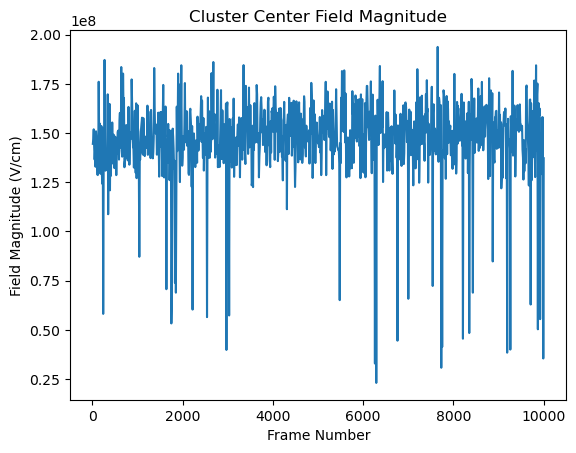

In [4]:
mags_center = np.array([i["mag"] for i in list_data_cluster_center])
# convert lists to magnitude
mags_center = np.sqrt(np.sum(mags_center**2, axis=1)) * 10**8
# plot the magnitude of the field at the center of the cluster
import matplotlib.pyplot as plt

frame_list = [i["frame_ind"] for i in list_data_cluster_center]
plt.title("Cluster Center Field Magnitude")
plt.ylabel("Field Magnitude (V/cm)")
# change y-axis ticks to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.xlabel("Frame Number")
plt.plot(frame_list, mags_center)
# rename xticks to 10x the frame number

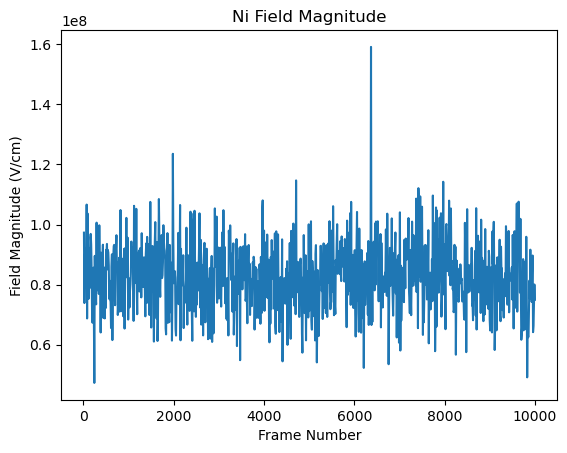

In [5]:
# plot the magnitude of the field at the Ni atom
mags_Ni = np.array([i["mag"] for i in list_data_Ni])
mags_Ni = np.sqrt(np.sum(mags_Ni**2, axis=1)) * 10**8
frame_list = [i["frame_ind"] for i in list_data_Ni]
# plot the magnitude of the field at the center of the cluster
plt.title("Ni Field Magnitude")
plt.xlabel("Frame Number")
plt.ylabel("Field Magnitude (V/cm)")
plt.plot(frame_list, mags_Ni)

In [9]:
folder_pqr = "./md_dev_data/field_w_solvent_temp/temp/"
# get all files ending with .pqr
pqr_files = [f for f in os.listdir(folder_pqr) if f.endswith(".pqr")]

In [10]:
list_data_cluster_center = [
    mag_from_pqr(folder_pqr + i, [959, 960, 961, 962, 963, 964, 965]) for i in pqr_files
]
list_data_Ni = [mag_from_pqr(folder_pqr + i, [966]) for i in pqr_files]

In [12]:
frame_inds_list = [
    int(i["name"].split("/")[-1].split(".")[0].split("_")[1])
    for i in list_data_cluster_center
]
for ind in range(len(list_data_cluster_center)):
    # frame_inds_list[ind]
    list_data_cluster_center[ind]["frame_ind"] = frame_inds_list[ind]


frame_inds_list = [
    int(i["name"].split("/")[-1].split(".")[0].split("_")[1]) for i in list_data_Ni
]
for ind in range(len(list_data_Ni)):
    # frame_inds_list[ind]
    list_data_Ni[ind]["frame_ind"] = frame_inds_list[ind]
# sort by frame_ind
list_data_cluster_center.sort(key=lambda x: x["frame_ind"])
list_data_Ni.sort(key=lambda x: x["frame_ind"])
# print(frame_inds_list)

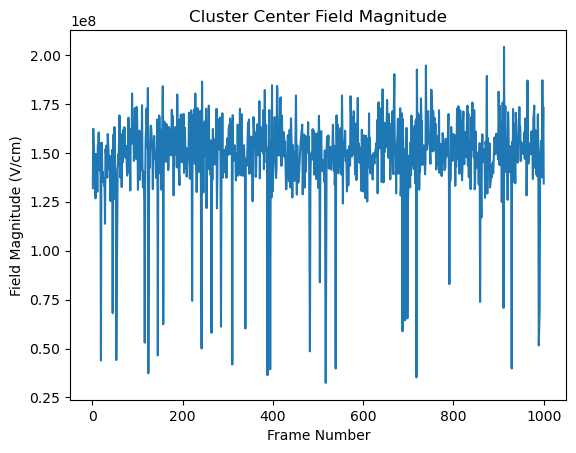

In [13]:
mags_center = np.array([i["mag"] for i in list_data_cluster_center])
# convert lists to magnitude
mags_center = np.sqrt(np.sum(mags_center**2, axis=1)) * 10**8
# plot the magnitude of the field at the center of the cluster
import matplotlib.pyplot as plt

frame_list = [i["frame_ind"] for i in list_data_cluster_center]
plt.title("Cluster Center Field Magnitude")
plt.ylabel("Field Magnitude (V/cm)")
# change y-axis ticks to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.xlabel("Frame Number")
plt.plot(frame_list, mags_center)

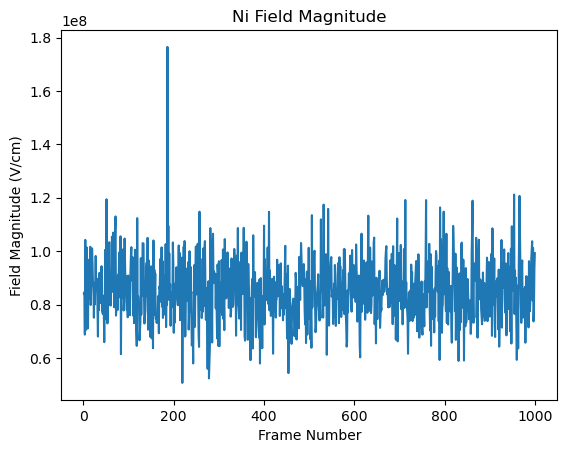

In [14]:
# plot the magnitude of the field at the Ni atom
mags_Ni = np.array([i["mag"] for i in list_data_Ni])
mags_Ni = np.sqrt(np.sum(mags_Ni**2, axis=1)) * 10**8
frame_list = [i["frame_ind"] for i in list_data_Ni]
# plot the magnitude of the field at the center of the cluster
plt.title("Ni Field Magnitude")
plt.xlabel("Frame Number")
plt.ylabel("Field Magnitude (V/cm)")
plt.plot(frame_list, mags_Ni)

In [63]:

def mag_from_pqr(path_to_pqr, atom_ids, n1_id, n2_id):
    x, Q, atom_num_list = parse_pqr(path_to_pqr, ret_atom_names=True)
    # get atom number of the atom we are interested in
    seek_indices = [atom_num_list.index(i) for i in atom_ids]
    seek_index_n1 = atom_num_list.index(n1_id)
    seek_index_n2 = atom_num_list.index(n2_id)
    centers = x[seek_indices]
    # center is the mean of the coordinates of the atoms
    center = np.mean(centers, axis=0)

    #x_axis = np.array(np.array([1, 0, 0]))
    #y_axis = np.array(np.array([0, 1, 0]))
    x_axis = x[seek_index_n2] - center
    y_axis = x[seek_index_n1] - center
    transformation_matrix = get_transformation(center, x_axis, y_axis)
    x = (x - center) @ np.linalg.inv(transformation_matrix)
    x, Q = filter_pqr(x, Q, np.array([0.0, 0.0, 0.0]), radius=2.0)
    
    
    mag = calculate_field_at_point(x, Q) * 100
    mag_singular = np.linalg.norm(mag, axis=0) 
    ret = {"mag": mag.tolist(), "name": path_to_pqr}
    return ret


# HEML center magnitudes
! ls ../../Downloads/vis_hemes_center/1u5u_Y/charges_processed
mag_dicts = []
dir_1u5u = "../../Downloads/vis_hemes_center/1u5u_Y/charges_processed/"
dir_1jio = "../../Downloads/vis_hemes_center/1jio_C/charges_processed/"
dir_3vxi= "../../Downloads/vis_hemes_center/3vxi_H/charges_processed/"
pqr_files = [f for f in os.listdir(dir_1u5u) if f.endswith(".pqr")]
mags_1u5u = [mag_from_pqr(dir_1u5u + file, [5893], n1_id=5932, n2_id=5933) for file in pqr_files]
pqr_files = [f for f in os.listdir(dir_1jio) if f.endswith(".pqr")]
mags_1jio = [mag_from_pqr(dir_1jio + file, [6326], n1_id=6331, n2_id=6342) for file in pqr_files]
pqr_files = [f for f in os.listdir(dir_3vxi) if f.endswith(".pqr")]
mags_3vxi = [mag_from_pqr(dir_3vxi + file, [6519], n1_id=6558, n2_id=6559) for file in pqr_files]
#folder_pqr = "./md_dev_data/field_calc_for_aa/"
# get all files ending with .pqr
#pqr_files = [f for f in os.listdir(folder_pqr) if f.endswith(".pqr")]

1u5u-run1-404.pqr  1u5u-run1-473.pqr  1u5u-run1-983.pqr


In [64]:
mags_1u5u

[{'mag': [18.656324562021513, -6.134913852424038, -8.893830159784994],
  'name': '../../Downloads/vis_hemes_center/1u5u_Y/charges_processed/1u5u-run1-404.pqr'},
 {'mag': [15.63188355637993, 2.951013035828419, 7.35245981475557],
  'name': '../../Downloads/vis_hemes_center/1u5u_Y/charges_processed/1u5u-run1-983.pqr'},
 {'mag': [13.276670307403954, -13.27573166581448, -4.101901255496849],
  'name': '../../Downloads/vis_hemes_center/1u5u_Y/charges_processed/1u5u-run1-473.pqr'}]

In [67]:
mags_3vxi

[{'mag': [23.3202829122582, -1.6341341100844133, 5.95616151636227],
  'name': '../../Downloads/vis_hemes_center/3vxi_H/charges_processed/3vxi-run1-639.pqr'},
 {'mag': [-0.021862708366895155, 13.508182641745513, 16.2260235888329],
  'name': '../../Downloads/vis_hemes_center/3vxi_H/charges_processed/3vxi-run1-004.pqr'},
 {'mag': [28.8756183625322, 9.397717068731131, 18.76881089580491],
  'name': '../../Downloads/vis_hemes_center/3vxi_H/charges_processed/3vxi-run1-270.pqr'},
 {'mag': [36.53444021644917, 2.0610685129039052, 5.661911120830478],
  'name': '../../Downloads/vis_hemes_center/3vxi_H/charges_processed/3vxi-run1-489.pqr'}]

In [68]:
mags_1jio

[{'mag': [7.179767708097476, -8.277681997328848, -0.7592132390464141],
  'name': '../../Downloads/vis_hemes_center/1jio_C/charges_processed/1jio-run1-122.pqr'},
 {'mag': [-28.299380782615536, -2.445183613033184, 38.05500502054041],
  'name': '../../Downloads/vis_hemes_center/1jio_C/charges_processed/1jio-run1-840.pqr'},
 {'mag': [2.104650659527922, -1.9450949094537613, -1.7555360107248417],
  'name': '../../Downloads/vis_hemes_center/1jio_C/charges_processed/1jio-run1-112.pqr'}]